In [40]:
from NNScratchLib.models import MultiClassModels, Layers
from NNScratchLib.functions import activation_functions
from NNScratchLib.functions import loss_functions
from NNScratchLib.functions import measure_functions

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

## Red Neuronal Para Clasificar el Dataset de Iris

### Definición de la red

In [41]:
nn = MultiClassModels.NeuralNetwork()
nn.set(Layers.SequentialLayer(4, 10, activation=activation_functions.sigmoid, 
                            activation_derivate=activation_functions.sigmoid_derivate))
nn.set(Layers.SequentialLayer(10, 3, activation=activation_functions.softmax,
                            activation_derivate=None))

### Dataset de Iris

In [42]:
iris = load_iris()
X, y = shuffle(iris.data, iris.target)

enc = OneHotEncoder()
y = enc.fit_transform(y.reshape(-1,1)).toarray()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Entrenamiento de la red

In [44]:
for i in range(300):
    for j in range(len(X)):
        nn.backpropagation(X[j], y[j], lr=0.0001)

    if i%10 == 0:
        Y_pred = [nn.feedfoward(x) for x in X_test]
        acc = measure_functions.accuracy(y_test, Y_pred)

        print(f'epoch {i:3} - accuracy {acc:.5f}')


epoch   0 - accuracy 0.36667
epoch  10 - accuracy 0.70000
epoch  20 - accuracy 0.70000
epoch  30 - accuracy 0.76667
epoch  40 - accuracy 0.70000
epoch  50 - accuracy 0.70000
epoch  60 - accuracy 0.70000
epoch  70 - accuracy 0.73333
epoch  80 - accuracy 0.76667
epoch  90 - accuracy 0.76667
epoch 100 - accuracy 0.76667
epoch 110 - accuracy 0.76667
epoch 120 - accuracy 0.76667
epoch 130 - accuracy 0.76667
epoch 140 - accuracy 0.76667
epoch 150 - accuracy 0.76667
epoch 160 - accuracy 0.86667
epoch 170 - accuracy 0.90000
epoch 180 - accuracy 0.90000
epoch 190 - accuracy 0.93333
epoch 200 - accuracy 0.93333
epoch 210 - accuracy 0.93333
epoch 220 - accuracy 0.93333
epoch 230 - accuracy 0.93333
epoch 240 - accuracy 0.93333
epoch 250 - accuracy 0.93333
epoch 260 - accuracy 0.93333
epoch 270 - accuracy 0.93333
epoch 280 - accuracy 0.93333
epoch 290 - accuracy 0.93333


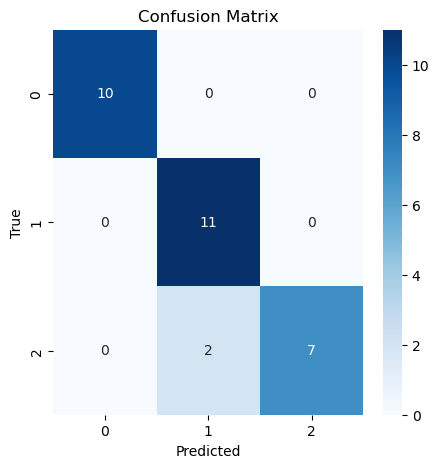

In [45]:
Y_pred = [np.argmax(nn.feedfoward(x)) for x in X_test]
Y_test = [np.argmax(y) for y in y_test]

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Red Neuronal Para Clasificar el Dataset de MNIST

### Definimos la red

In [46]:
nn = MultiClassModels.NeuralNetwork()
nn.set(Layers.SequentialLayer(784, 10, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
nn.set(Layers.SequentialLayer(10, 10, activation=activation_functions.softmax, 
                                activation_derivate=None))

### Dataset de MNIST

In [47]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [48]:
x_train = x_train.reshape((-1, 28*28))
x_train = x_train.astype('float64')/255

x_test = x_test.reshape((-1, 28*28))
x_test = x_test.astype('float64')/255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

### Entrenamiento de la red

In [49]:
print("accuracy before training: ", measure_functions.accuracy(y_test, [nn.feedfoward(x) for x in x_test]))

for i in range(10):
    for j in range(len(x_train)):
        nn.backpropagation(x_train[j], y_train[j], lr=0.01)

    Y_pred = [nn.feedfoward(x) for x in x_test]
    acc = measure_functions.accuracy(y_test, Y_pred)
    print(f'epoch {i:3} - accuracy {acc:.5f}')


accuracy before training:  0.0651
epoch   0 - accuracy 0.85840
epoch   1 - accuracy 0.87490
epoch   2 - accuracy 0.86800
epoch   3 - accuracy 0.86590
epoch   4 - accuracy 0.84960
epoch   5 - accuracy 0.86000
epoch   6 - accuracy 0.87920
epoch   7 - accuracy 0.88360
epoch   8 - accuracy 0.88600
epoch   9 - accuracy 0.88650


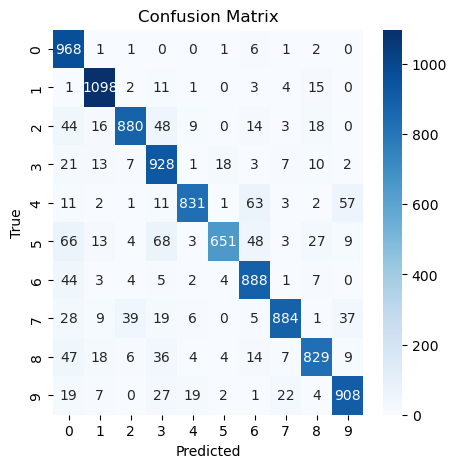

In [50]:
Y_pred = [np.argmax(nn.feedfoward(x)) for x in x_test]
Y_test = [np.argmax(y) for y in y_test]

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()